## Assignment no 45 Label, Ordinal & Target Encoding (21.3.23)

In [ ]:
Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you
might choose one over the other.

Ans - Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data with a little
    difference as mentioned in definitions below - 

Ordinal Encoding
    It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is 
    assigned a numerical value based on its position in the order.

Label Encoding
    Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually 
    assigned in alphabetical order or based on the frequency of the categories.

    eg. When we have to encode the position of empolyee within company where the rank or order matters then we will use the
        Ordinal type Encoding 
        on the other hand,
        If there are various types of fruits in dataset and we have to encode them, then we will use Label encoding.


In [ ]:
Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in
a machine learning project.

Ans - Target Guided Ordinal Encoding
        In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based
    on the mean or median of the target variable for that category. 
        This creates a monotonic relationship between the categorical variable and the target variable, which can improve 
    the predictive power of our model.

In [1]:
import pandas as pd

In [2]:
df_bikeavg = pd.DataFrame({'bike':['passion','dio','gixxer','splendor','passion','splendor','gixxer','splendor','passion'],
                          'average':[65,55,45,70,62,72,50,75,67]})

In [3]:
df_bikeavg

,bike,average
0,passion,65
1,dio,55
2,gixxer,45
3,splendor,70
4,passion,62
5,splendor,72
6,gixxer,50
7,splendor,75
8,passion,67


In [4]:
df_bikeavg.groupby('bike')['average'].mean()

bike
dio         55.000000
gixxer      47.500000
passion     64.666667
splendor    72.333333
Name: average, dtype: float64

In [5]:
df_bikeavg.groupby('bike')['average'].mean().to_dict()

{'dio': 55.0,
 'gixxer': 47.5,
 'passion': 64.66666666666667,
 'splendor': 72.33333333333333}

In [6]:
# finding mean of average to relate with target variable

mean_average = df_bikeavg.groupby('bike')['average'].mean().to_dict()
mean_average

{'dio': 55.0,
 'gixxer': 47.5,
 'passion': 64.66666666666667,
 'splendor': 72.33333333333333}

In [7]:
df_bikeavg['bike_encoded'] = df_bikeavg['bike'].map(mean_average)

In [8]:
df_bikeavg

,bike,average,bike_encoded
0,passion,65,64.666667
1,dio,55,55.000000
2,gixxer,45,47.500000
3,splendor,70,72.333333
4,passion,62,64.666667
5,splendor,72,72.333333
6,gixxer,50,47.500000
7,splendor,75,72.333333
8,passion,67,64.666667


Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

Ans - 
- Covariance is a measure of the extent to which two random variables are linearly related. Specifically, it measures
    the degree to which the values of one variable change in relation to the values of another variable. If two variables       have a positive covariance, it means that when one variable increases, the other variable tends to increase as well. If     they have a negative covariance, it means that when one variable increases, the other variable tends to decrease. If the     covariance is zero, it means that the variables are not linearly related.
    
- Covariance is important in statistical analysis because it is a measure of the strength and direction of the 
    relationship between two variables. This relationship can provide important insights into the underlying nature of the 
    data and can inform decisions about modeling and prediction. For example, in finance, covariance is used to measure the 
    degree to which the returns on two different stocks are related, which can help investors diversify their portfolios.
    
- Covariance is calculated as the sum of the product of the deviations of each variable from its mean, divided by the 
    sample size minus one. The formula for the covariance between two variables X and Y with sample size n is:
        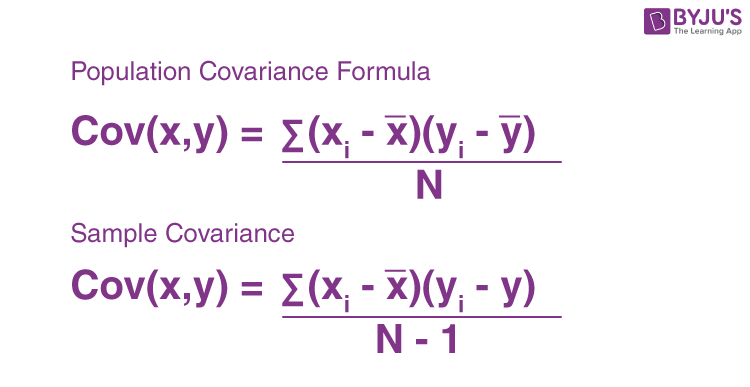

        where X_i and Y_i are the values of the variables at the ith observation, X_mean and Y_mean are the means of the 
    variables, and the summation is taken over all n observations.

In [ ]:
Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium,
large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library.
Show your code and explain the output.

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.DataFrame({'Color' : ['red', 'green', 'blue'], 'Size' : ['small', 'medium','large'],
                   'Material' : ['wood', 'metal', 'plastic']})
df

,Color,Size,Material
0,red,small,wood
1,green,medium,metal
2,blue,large,plastic


In [13]:
encoder = LabelEncoder()

In [15]:
color_encoded = encoder.fit_transform(df['Color'])
color_encoded

array([2, 1, 0])

In [16]:
size_encoded = encoder.fit_transform(df['Size'])
size_encoded

array([2, 1, 0])

In [17]:
material_encoded = encoder.fit_transform(df['Material'])
material_encoded

array([2, 0, 1])

In [18]:
df_encoded = pd.DataFrame({'Color_Enc': list(color_encoded),'Size_Enc': list(size_encoded),
                           'Material_Enc': list(material_encoded)})
df_encoded

,Color_Enc,Size_Enc,Material_Enc
0,2,2,2
1,1,1,0
2,0,0,1


In [21]:
final_df = pd.concat([df, df_encoded], axis = 1)
final_df

,Color,Size,Material,Color_Enc,Size_Enc,Material_Enc
0,red,small,wood,2,2,2
1,green,medium,metal,1,1,0
2,blue,large,plastic,0,0,1


In [ ]:
Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education
level. Interpret the results.

In [23]:
import pandas as pd

In [28]:
#creating dataframe
df = pd.DataFrame({'Age':[30,36,38,32], 'Income':[50000, 55000, 60000, 70000],
                 'Education':['diploma','graduate','masters','phd']})
df

,Age,Income,Education
0,30,50000,diploma
1,36,55000,graduate
2,38,60000,masters
3,32,70000,phd


In [31]:
df_matrix = df.cov()
df_matrix

/tmp/ipykernel_92/2098098332.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_matrix = df.cov()


,Age,Income
Age,13.333333,3.333333e+03
Income,3333.333333,7.291667e+07


In [32]:
# importing ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

In [33]:
# creating instance

ord_encoder = OrdinalEncoder(categories = [['diploma','graduate','masters','phd']])

In [37]:
# fitting and transforming data

ord_encoded = ord_encoder.fit_transform(df[['Education']])

In [38]:
df_ord_encoded = pd.DataFrame(ord_encoded)

In [39]:
df_ord_encoded.columns = ['Ordinal Encoded Education']

In [40]:
df_ord_encoded

,Ordinal Encoded Education
0,0.0
1,1.0
2,2.0
3,3.0


In [41]:
final_df = pd.concat([df, df_ord_encoded], axis=1)

In [42]:
final_df

,Age,Income,Education,Ordinal Encoded Education
0,30,50000,diploma,0.0
1,36,55000,graduate,1.0
2,38,60000,masters,2.0
3,32,70000,phd,3.0


In [45]:
final_df.cov()

/tmp/ipykernel_92/2790656087.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.cov()


,Age,Income,Ordinal Encoded Education
Age,13.333333,3.333333e+03,1.333333
Income,3333.333333,7.291667e+07,10833.333333
Ordinal Encoded Education,1.333333,1.083333e+04,1.666667


In [ ]:
Interpretation of the results:
    The covariance between age and income is 3.33, indicating that there is a positive relationship between these two 
    variables. This means that as age increases, income tends to increase as well. The covariance between age and education 
    level is 1.33, indicating a weak positive relationship. This means that as age increases, education level tends to 
    increase slightly. The covariance between income and education level is 10833.33, indicating a weak positive relationship
    . This means that as income increases, education level tends to increase slightly.

In [ ]:
Q6. You are working on a machine learning project with a dataset containing several categorical
variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD),
and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for
each variable, and why?

Ans - 

    For the "Gender" variable, I would use Label Encoding, as there are only two categories, Male and Female, and there is 
    no order or rank between the categories.

    For the "Education Level" variable, I would use Ordinal Encoding, as rank or order matters between the categories, with 
    a higher education level being "better" than a lower education level. I would assign an ordinal value to each category 
    based on its level of education, with High School being the lowest and PhD being the highest.

    For the "Employment Status" variable, I would use One-Hot Encoding, as there are three categories, and there is no 
    inherent order or hierarchy between the categories. One-Hot Encoding creates a binary variable for each category, 
    with a value of 1 if the observation belongs to that category, and a value of 0 otherwise. This approach ensures that 
    there is no implied ranking or order between the categories.

In [ ]:
Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two
categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/
East/West). Calculate the covariance between each pair of variables and interpret the results.

In [12]:
import pandas as pd

df = pd.DataFrame({
    'Temperature': [40,22,25,45,36],
    'Humidity': [60,85,40,56,22],
    'Weather Condition': ['Sunny', 'Cloudy', 'Rainy','Sunny', 'Cloudy'],
    'Wind Direction': ['North', 'South', 'East','South', 'West']
})

df.head()

,Temperature,Humidity,Weather Condition,Wind Direction
0,40,60,Sunny,North
1,22,85,Cloudy,South
2,25,40,Rainy,East
3,45,56,Sunny,South
4,36,22,Cloudy,West


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

weather_encoded = encoder.fit_transform(df['Weather Condition'])
wind_encoded = encoder.fit_transform(df['Wind Direction'])

list(weather_encoded)

df_encoded = pd.DataFrame({
    'Weather Cond Encoded': list(weather_encoded),
    'Wind Dir Encoded': list(wind_encoded)
})

df_new = pd.concat([df, df_encoded], axis=1)
df_new = df_new.drop('Weather Condition', axis=1)
df_new = df_new.drop('Wind Direction', axis=1)

df_new

,Temperature,Humidity,Weather Cond Encoded,Wind Dir Encoded
0,40,60,2,1
1,22,85,0,2
2,25,40,1,0
3,45,56,2,2
4,36,22,0,3


In [14]:
#covariance between Temperature and Humidity
cov_1 = df_new['Temperature'].cov(df_new['Humidity'])

#covariance between Weather Condition and Wind Direction
cov_2 = df_new['Weather Cond Encoded'].cov(df_new['Wind Dir Encoded'])

print(f"Covariance between Temperature and Humidity: {cov_1:1f}")
print(f"Covariance between Weather Condition and Wind Direction: {cov_2:1f}")

Covariance between Temperature and Humidity: -63.700000
Covariance between Weather Condition and Wind Direction: -0.500000


In the given results, we have:

Covariance between Temperature and Humidity: -63.7 The negative value indicates that as temperature increases, humidity tends to decrease and vice versa. This may suggest an inverse relationship between temperature and humidity. For example, on a hot day, humidity is likely to be low.

Covariance between Weather Condition and Wind Direction: -0.5 Again, the negative value indicates an inverse relationship, but the small magnitude suggests that the two variables are not strongly related. This covariance result may indicate that changes in wind direction do not have a significant impact on weather conditions or vice versa.